<a href="https://colab.research.google.com/github/Boris-Bukowski/neon-edge-canvas/blob/main/AllLife_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Goal:

AllLife Bank wants to convert more of its deposit-only customers (liability customers) into loan customers (asset customers) without losing their deposits.


Current Status:

Existing loan customer base is small.

A previous campaign targeting liability customers yielded a 9%+ conversion rate, showing early signs of success.

Management now wants to scale this via better-targeted marketing.

 Objective:

 Predict whether a liability customer will accept a personal loan offer based on various customer attributes — i.e., a binary classification problem using the Personal_Loan column as the target variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading dataset from Google drive
file_path = '/content/drive/MyDrive/Masters - AI/Module 2 - Machine Learning/Project - AllLife/Loan_Modelling.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [4]:
# Check dimensions and first few rows
print("Shape of data:", df.shape)
df.head()


Shape of data: (5000, 14)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Shape of data: (5000, 14)

We have data for 5000 customers and 14 features / columns

In [5]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Data columns (total 14 columns):


*   13 columns of data-type int64

*   1 column (CCAvg) of data type float 64

*   No column with null values








In [ ]:
# Target variable distribution
df['Personal_Loan'].value_counts(normalize=True)

In [11]:
# Statistical summary
df.describe()
summary = df.describe()
summary

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Observations:



1.   Highly Imbalanced Target Variable


*  Only 9.6% of customers accepted a personal loan (Personal_Loan = 1).
*  Confirms class imbalance: this must be addressed using resampling or model tuning.



2. Income Distribution is Skewed


*   Mean income = $73.7K, but median = $64K, and max = $224K → **strong right skew**.
*   Suggests presence of **high-income outliers**; may need log transformation or binning.

3.  Experience Has Negative Values

* Minimum Experience = -3 years, which is logically invalid.

* Data cleaning step: filter or impute negative experience values.

4. Family Size -  Mostly Small
* Most customers have 1 to 3 family members (mean = 2.4, max = 4).

* Could be grouped into categorical buckets for feature clarity.

5. Credit Card and Online Banking Usage
* ~60% use online banking;
* ~30% use credit cards from other banks.
* Indicates digital-savvy or credit-active customers — possibly more open to loans.

6. Very Few Hold Securities or CD Accounts
* Only 10.4% have a Securities account;
* 6% have a CD account.
* Might be niche but high-value customer segments — worth checking for higher loan acceptance rates.

7. Mortgage is Sparse and Skewed
* Median Mortgage = $0, mean = $56.5K, max = $635K.
* Implies most customers don’t have mortgages, but a small number do — likely a predictor of wealth tier.








df.describe() gives summary stats like mean, median (50%), std, min, max, and quartiles (25%, 75%) for each numeric column.

From this, I infer:

* Skew → by comparing mean vs median

* Imbalance → from value counts in Personal_Loan

* Outliers or invalids → from unexpected min/max (like negative experience)

* Sparsity → when median = 0 but mean > 0 (e.g., Mortgage)


In [14]:
# Target variable distribution
df['Personal_Loan'].value_counts(normalize=True)

,proportion
Personal_Loan,
0,0.904
1,0.096


In [17]:
# Cleansing: Replace negative experience with median of valid ones
df.loc[df['Experience'] < 0, 'Experience'] = df[df['Experience'] >= 0]['Experience'].median()

df['Education'] = df['Education'].map({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})
df['Family'] = df['Family'].astype('category')


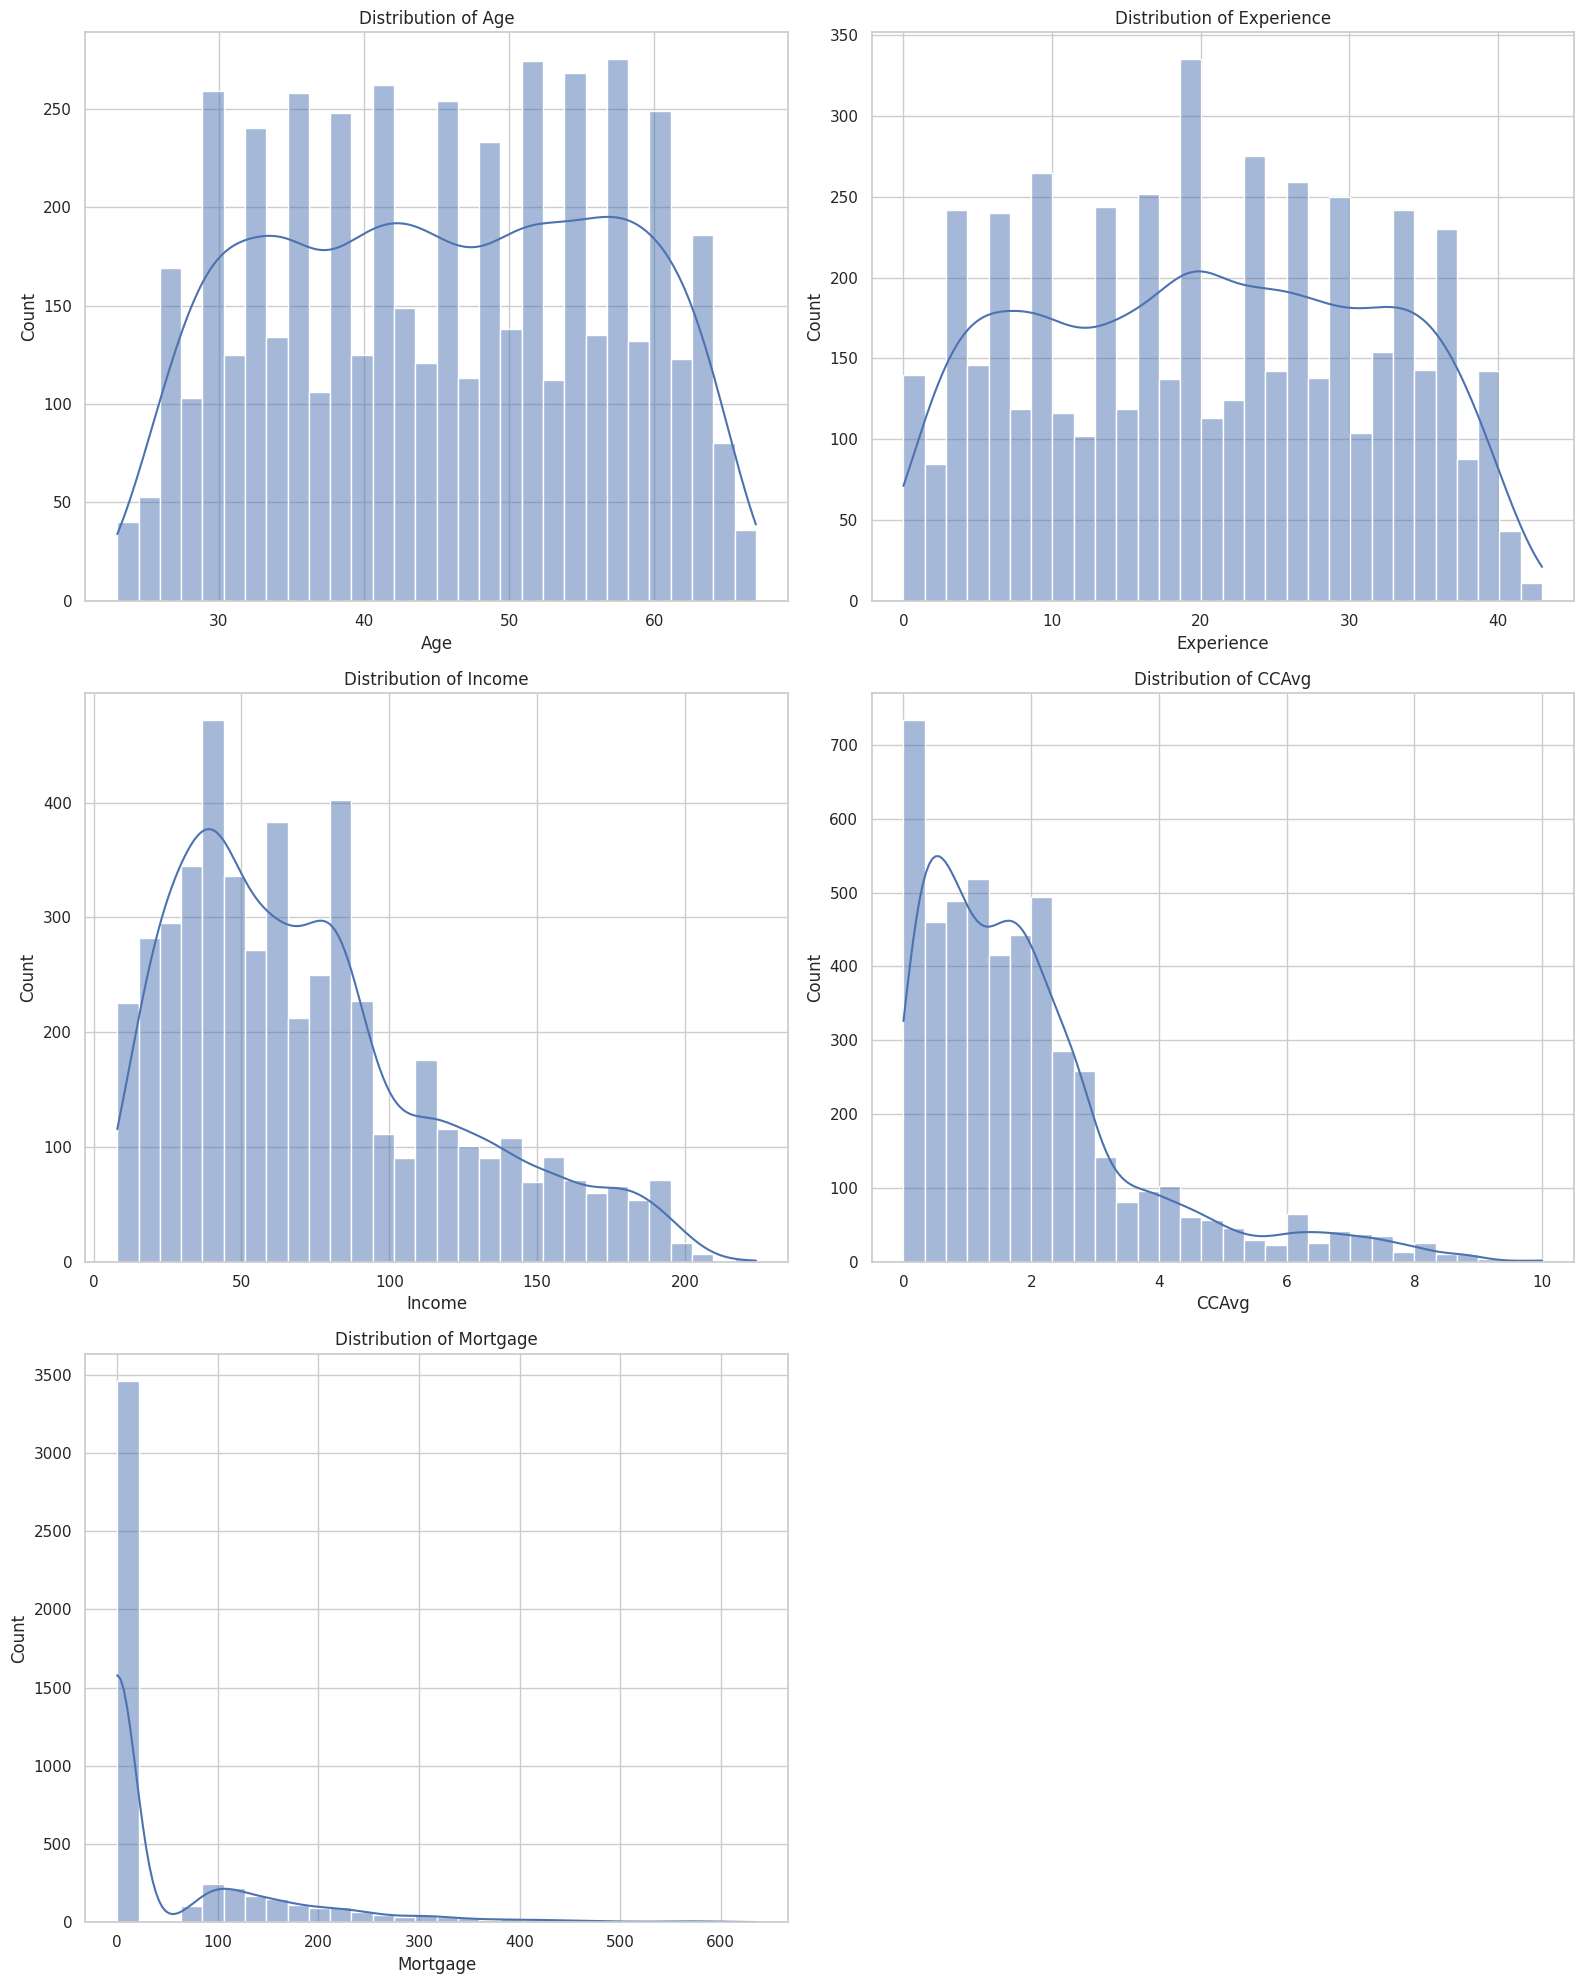

In [18]:
#univariate analysis
import matplotlib.pyplot as plt

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 20))

# List of numerical columns
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Plot histograms for numerical features
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Observations from univariate analysis of numerical columns:

1.
2.


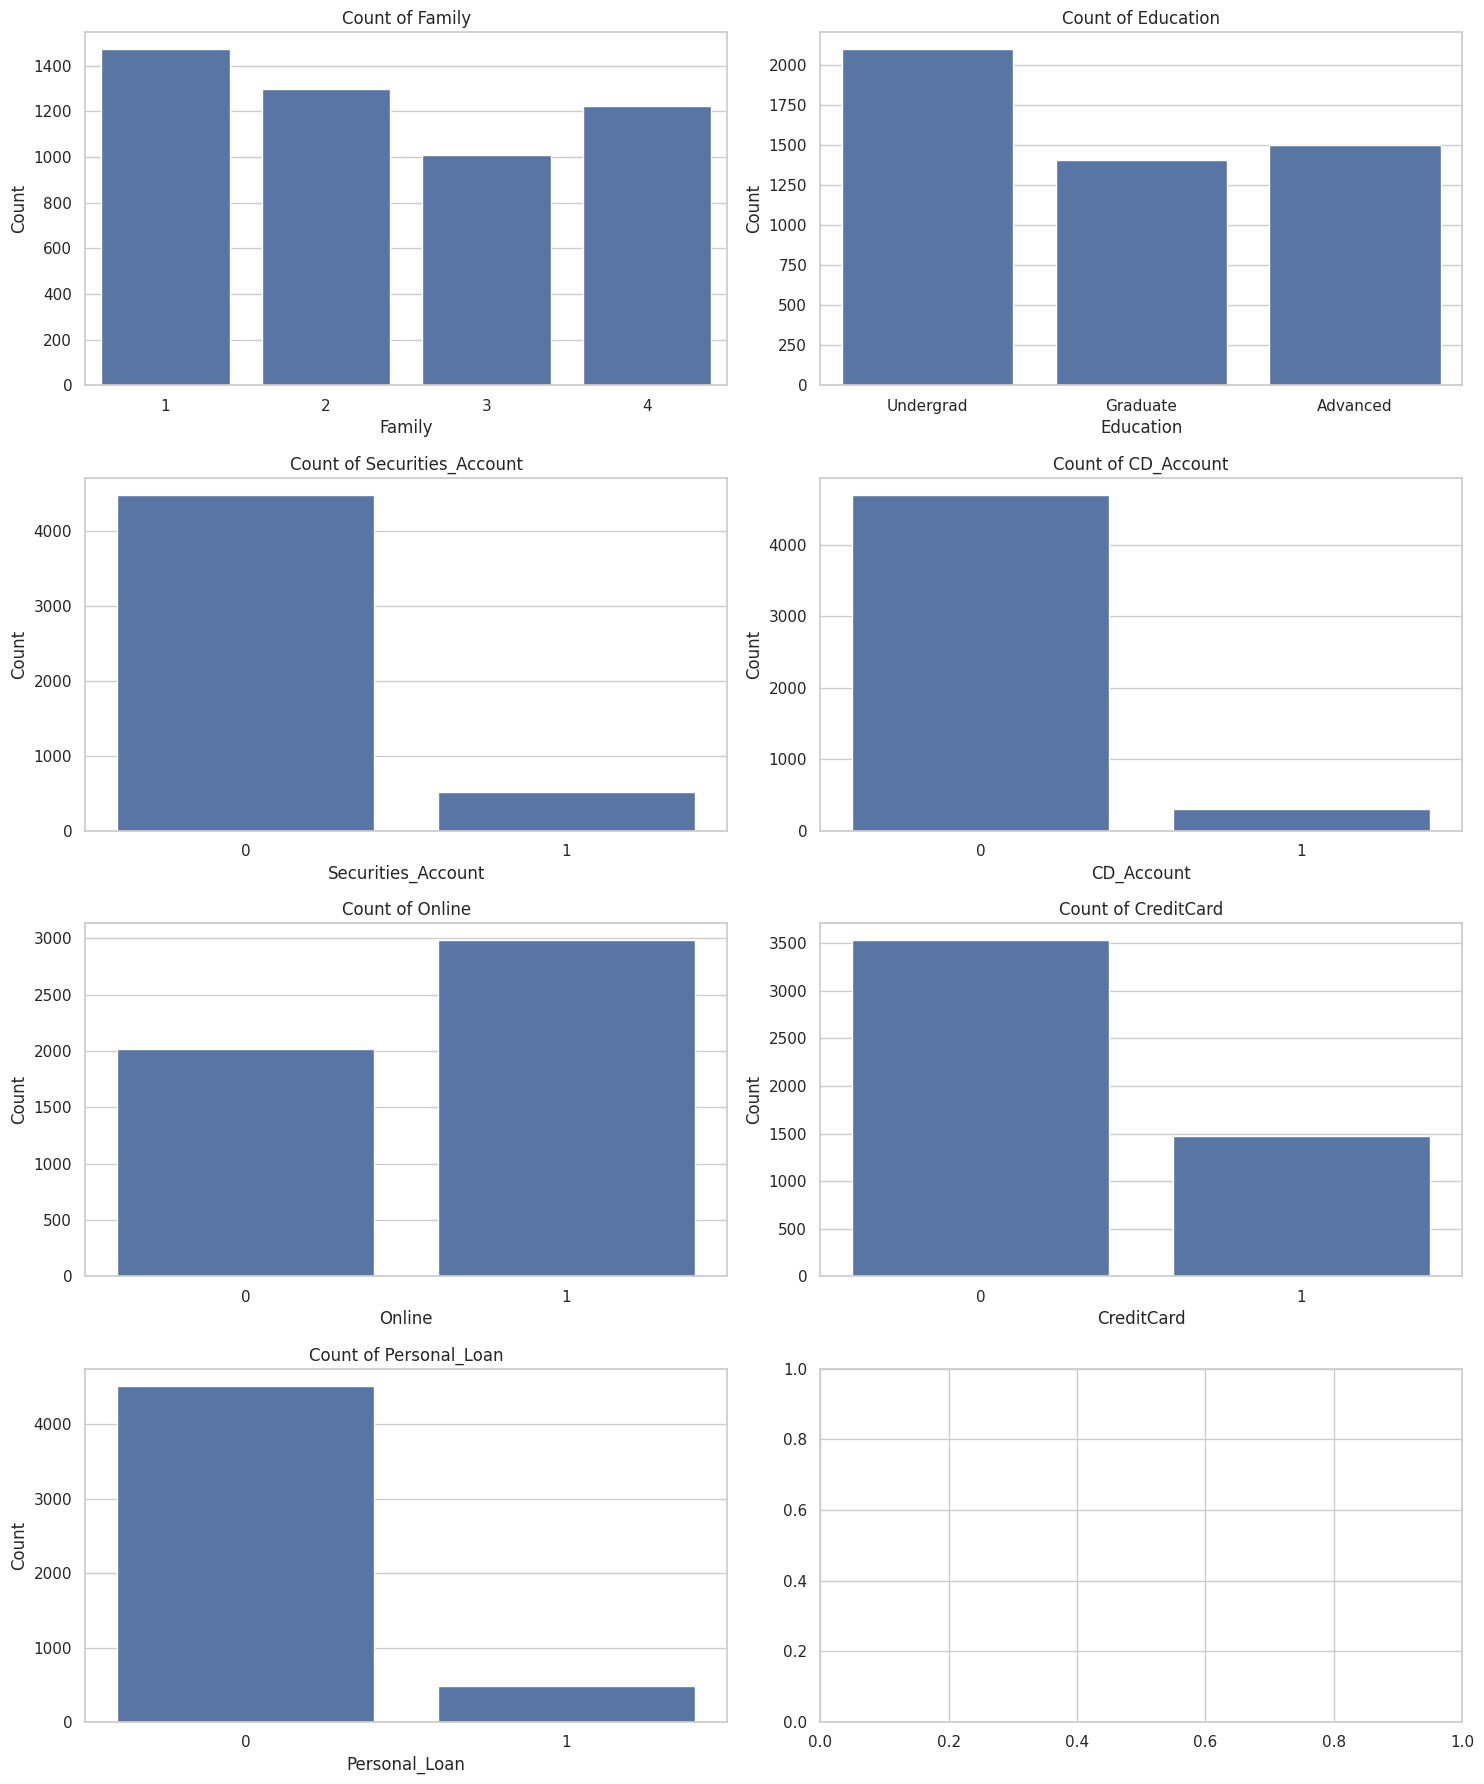

In [19]:
# Categorical columns
cat_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']

# Plot categorical variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


Observations:

1. Age is Centered Around 45
* Most customers are between 30 and 60 years old, with a peak around 45.

* Ideal age group for targeting personal loans due to stable income and credit profiles.

2. Income is Skewed with High Outliers
* Most customers earn between $30K to $100K, but some go beyond $200K.

* The presence of high-income outliers may impact models — log-scaling or capping.

3. Credit Card Spending (CCAvg) Has a Long Tail
* Majority spend below $3K/month, but some spend up to $10K.
* This variable likely correlates with disposable income and loan eligibility.

4. Most Customers Have No Mortgage
* Over half the customers have a $0 mortgage.

* The mortgage variable is sparse and skewed, suggesting that only a small segment holds home loans — useful for targeting higher asset segments.

5. Family Size is Balanced
* All 4 family sizes (1–4) are well-represented, with a slight peak at size 2 and 3.
* Loan conversion may vary across family size — worth deeper bivariate analysis.



Other observations:

6. Education Levels Are Fairly Balanced

* Undergrad: ~33%

* Graduate: ~33%

* Advanced/Professional: ~34%

A well-distributed feature — and likely ordinal in nature, so it may influence loan acceptance in a tiered way.

7. Securities Account: Most Customers Do not Have One
* ~90% of customers do not hold a securities account.

* Minority feature: may indicate wealthier or investment-savvy customers — potentially useful as a signal.

8. CD Account is Rare
* Over 94% do not hold a Certificate of Deposit (CD).
* Like Securities, this is rare but may indicate strong financial maturity among the few who do.

9. Online Banking Adoption is High
* ~60% of customers use online banking.
* Indicates decent digital penetration — important if digital engagement correlates with loan uptake.

10. Credit Card Usage from Other Banks is Moderate
* ~29% of customers use credit cards issued by other banks.

* This could be a flag for competitor influence, credit activity, or financial sophistication.

11. Personal Loan is Highly Imbalanced
* Only 9.6% accepted the personal loan offer.
* This confirms we are working with a severely imbalanced target, requiring special modeling techniques (like class weights or SMOTE).

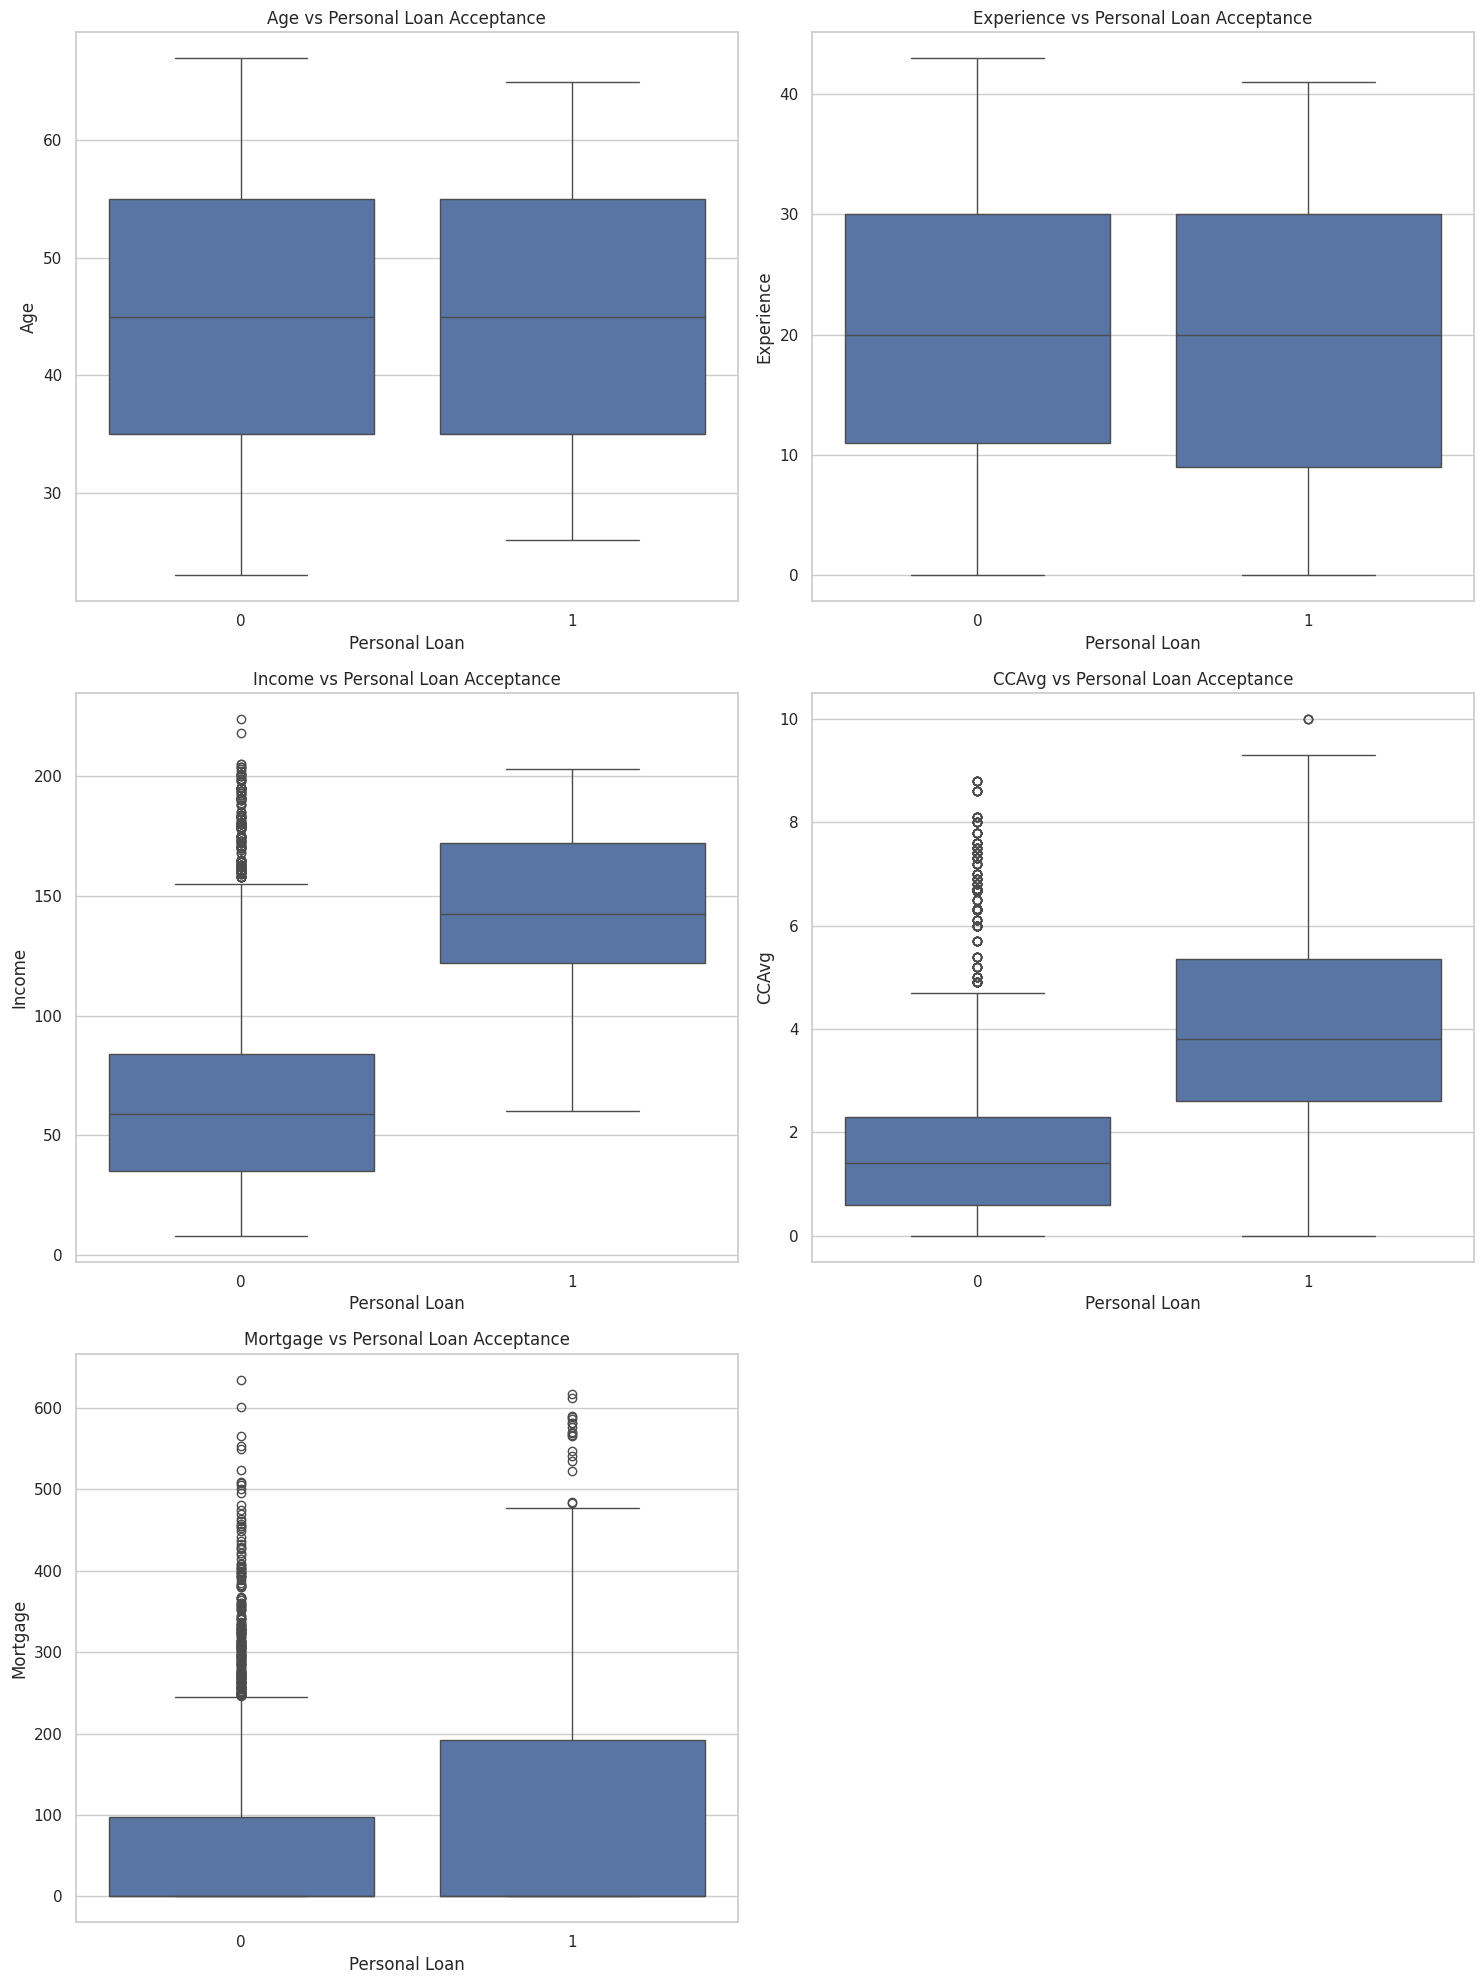

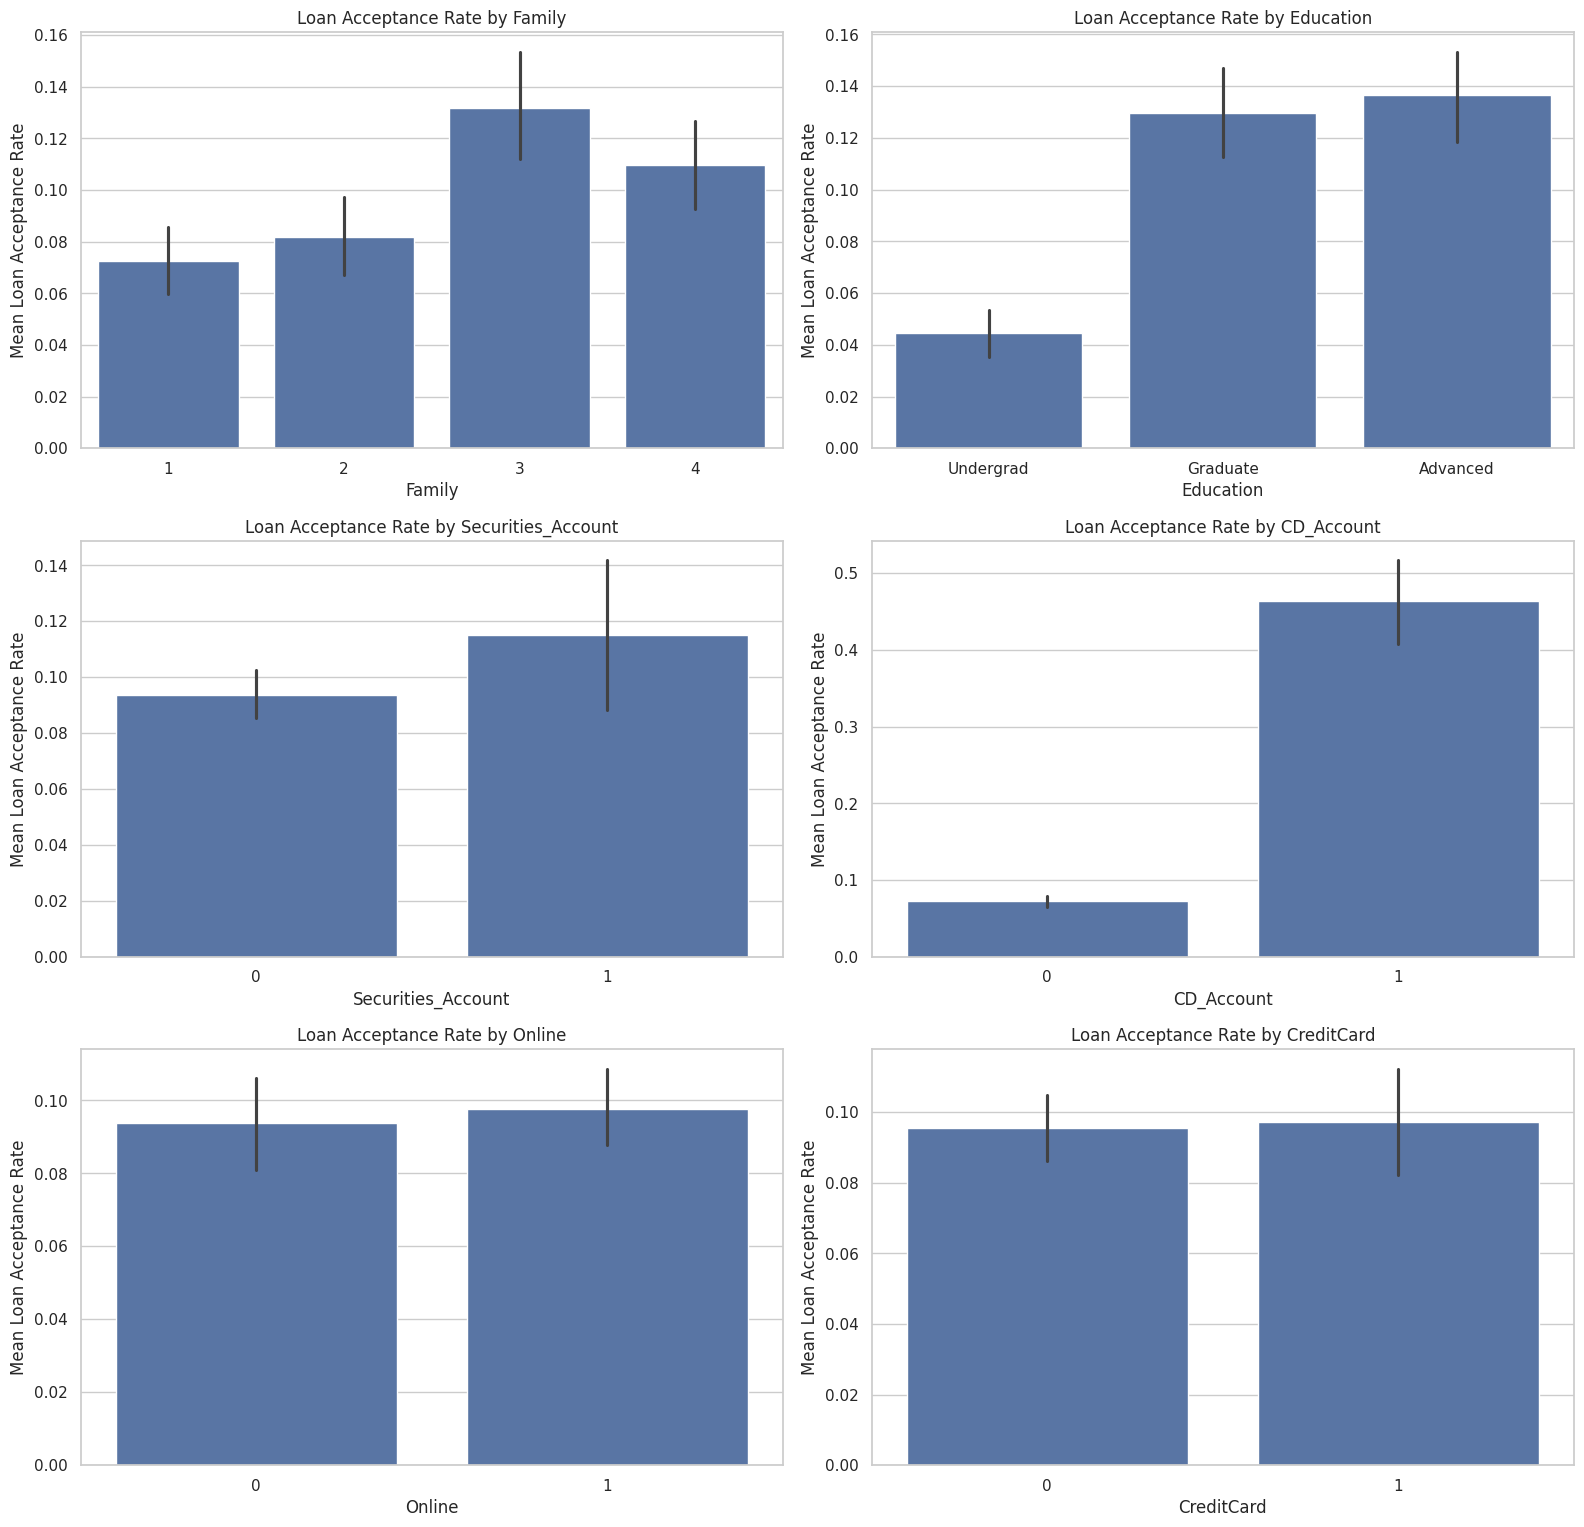

In [20]:
# Bivariate Analysis
# Set style
sns.set(style='whitegrid')

# -----------------------------
# 1. Numerical Features vs Personal_Loan
# -----------------------------
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Personal_Loan', y=col, data=df)
    plt.title(f'{col} vs Personal Loan Acceptance')
    plt.xlabel('Personal Loan')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Categorical/Binary Features vs Personal_Loan
# -----------------------------
cat_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i+1)
    sns.barplot(x=col, y='Personal_Loan', data=df)
    plt.title(f'Loan Acceptance Rate by {col}')
    plt.ylabel('Mean Loan Acceptance Rate')

plt.tight_layout()
plt.show()


Observations:
**Numerical Features (Boxplots)**

1. Income is Strongly Correlated with Loan Acceptance
* Customers who accepted loans have significantly higher income.
* Median income for loan-takers is much higher than for non-takers.
* This is a top predictor — higher earners are more likely to convert.

2. Credit Card Spending (CCAvg) is Also Higher Among Loan-Takers
* Customers who spend more on credit cards are more likely to accept loans.
* Suggests active financial behavior correlates with conversion.

3. Mortgage Amount Shows Moderate Influence
* Loan-takers tend to have slightly higher mortgages, but the difference is subtle.
* May act as a secondary indicator of financial responsibility or homeownership.

4. Age and Experience Are Not Strongly Predictive Alone
* No clear trend — both loan-takers and non-takers are spread across all age/experience levels.
* Could still play a role interactively (e.g., with income or education).

**Categorical Features (Barplots)**
5. Education Shows a Clear Trend
* Advanced and Graduate degree holders have the highest loan acceptance rates.
* Strongly supports using Education as an ordinal variable in modeling.

6. CD Account and Securities Account Holders Are Much More Likely to Accept Loans
* Customers with a CD account have dramatically higher loan acceptance (~60%+).
* Same for Securities Account holders.
* Though rare, these accounts are highly predictive flags.

7. Credit Card and Online Banking Users Also Convert More
* Both features are positively associated with loan acceptance.
* Digitally active or credit-engaged customers are more receptive to loan offers.

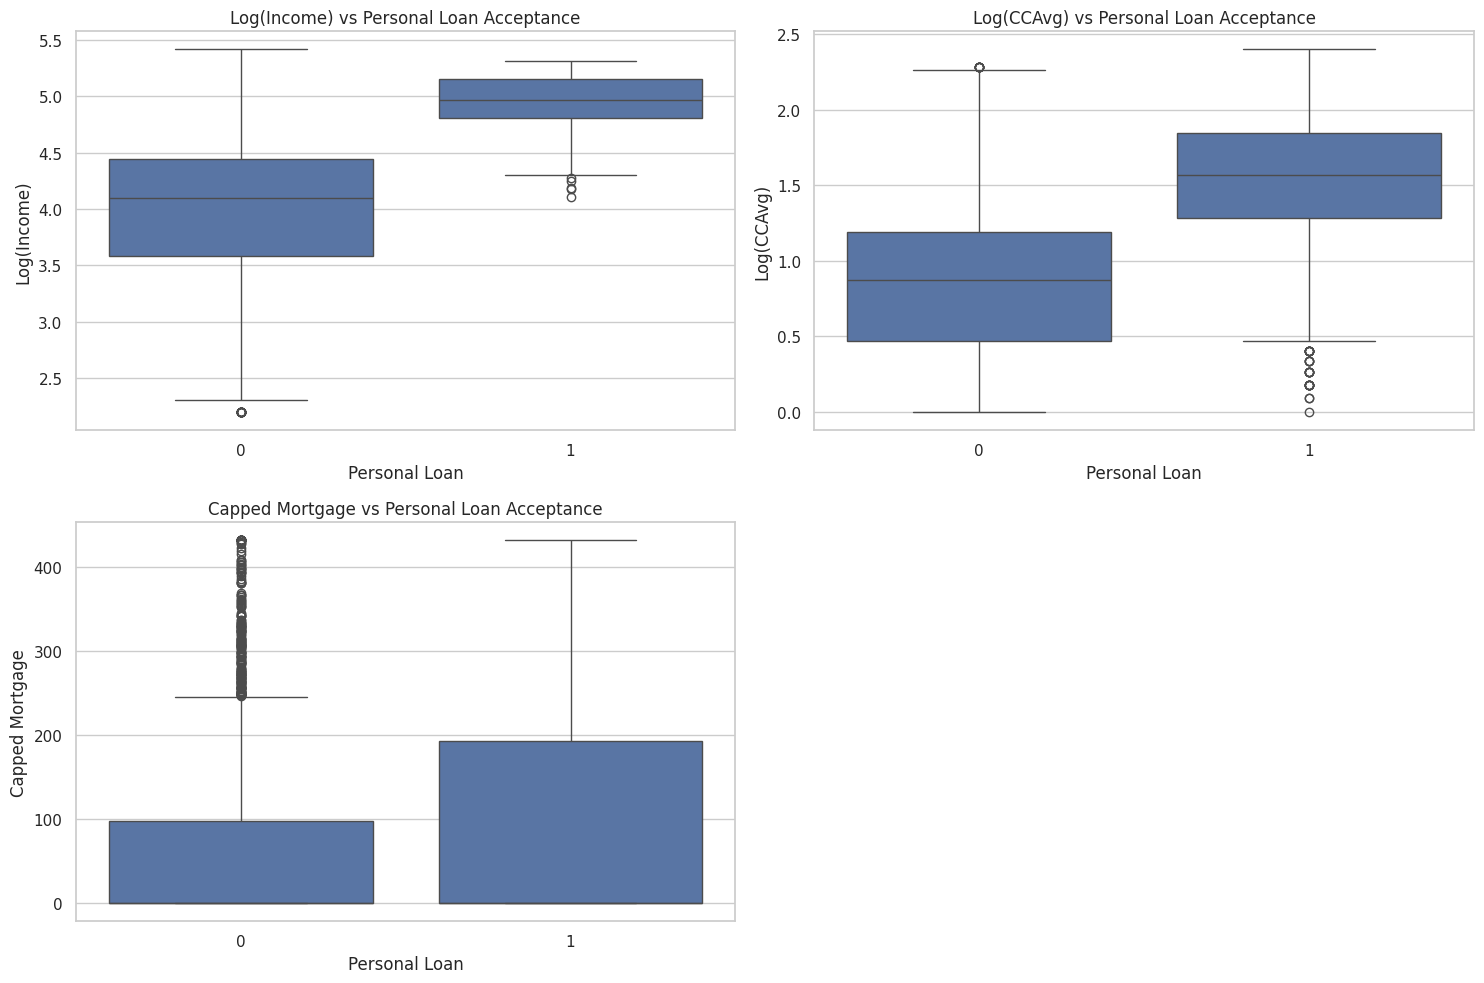

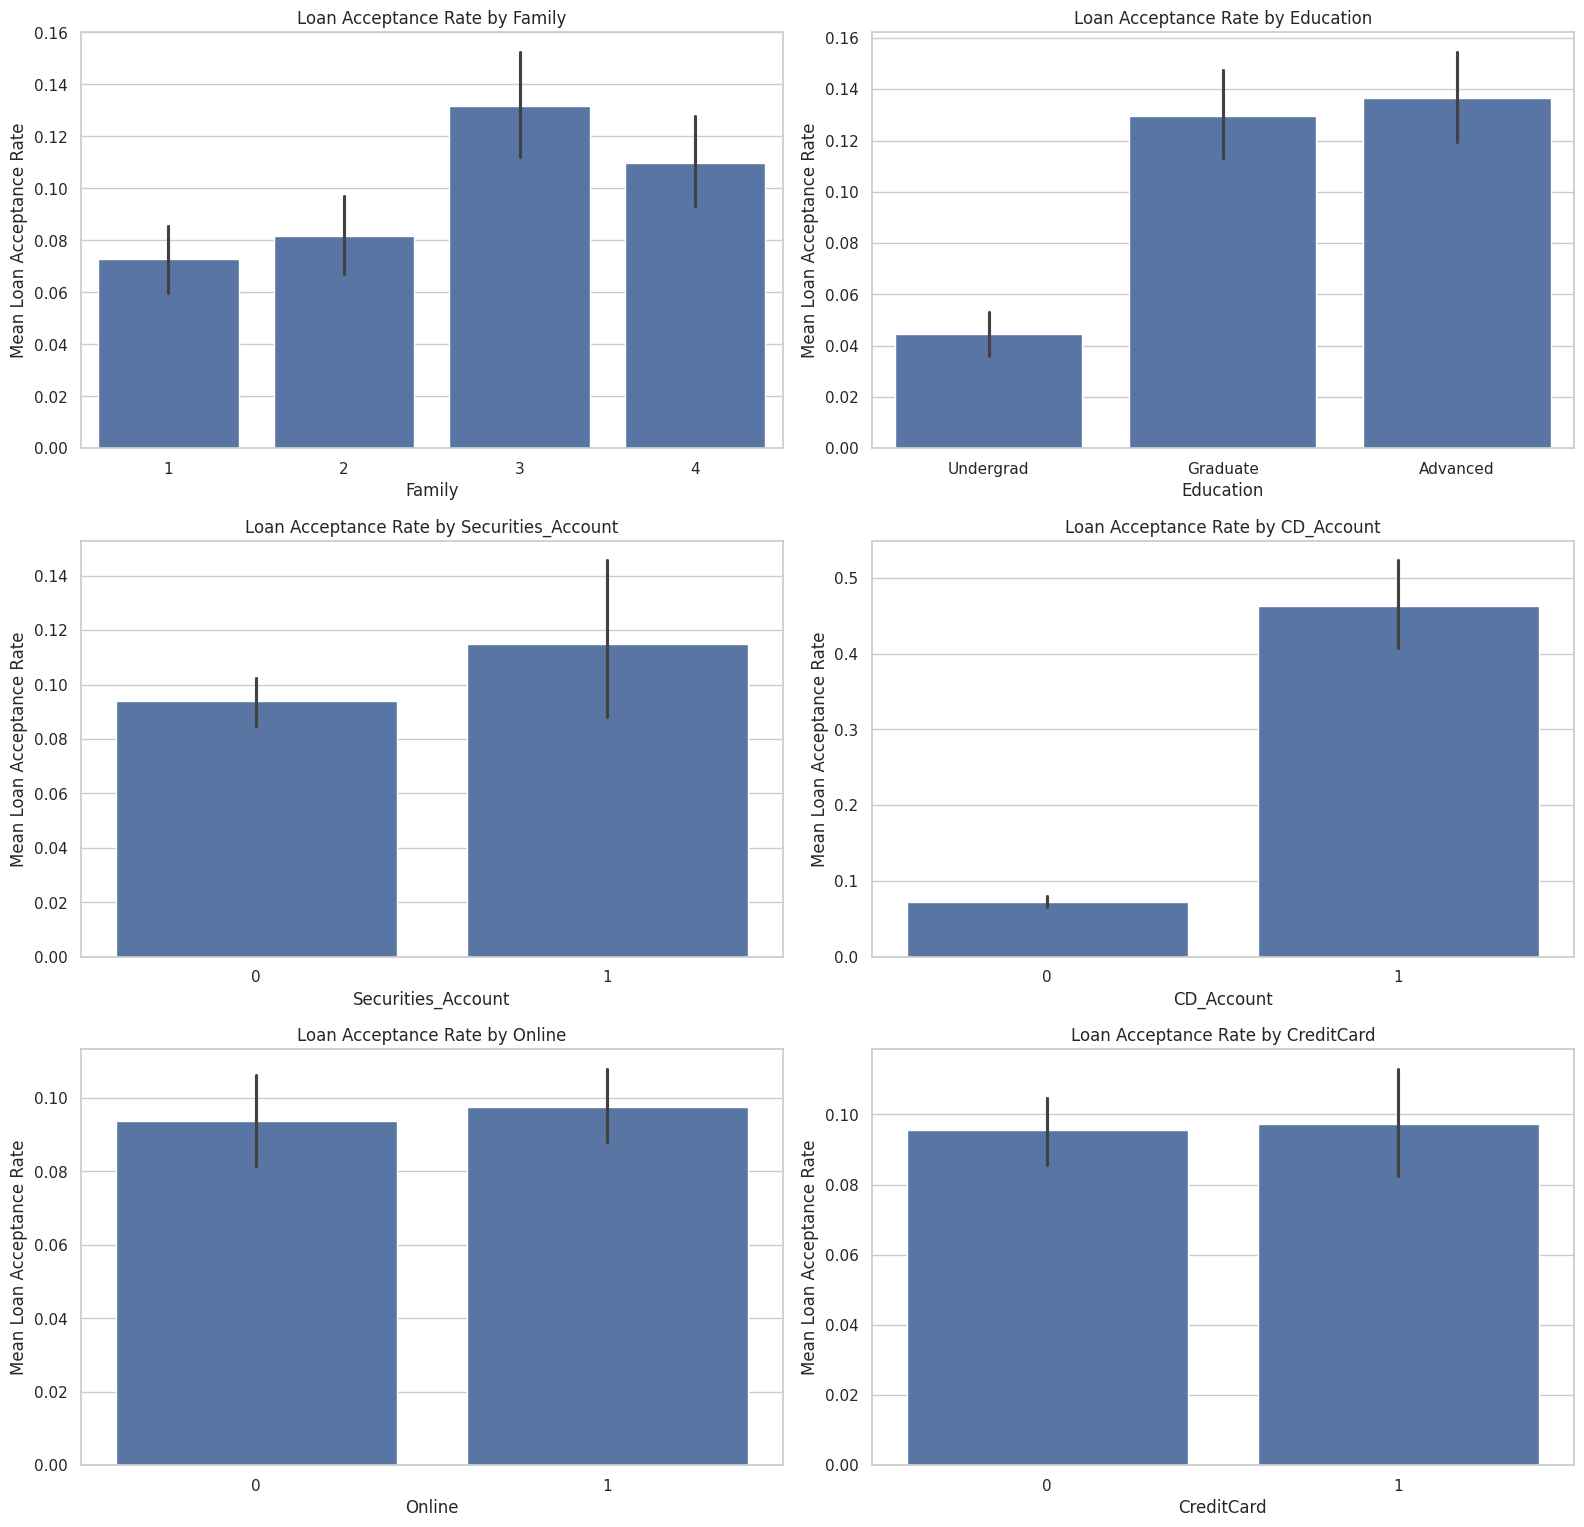

In [22]:
import numpy as np

# data preperation
# modified columns for skewed numeric features using log1p
df['Log_Income'] = np.log1p(df['Income'])
df['Log_CCAvg'] = np.log1p(df['CCAvg'])
df['Capped_Mortgage'] = df['Mortgage'].clip(upper=df['Mortgage'].quantile(0.99))

# improved bivariate analysis using the modified features
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 1. Boxplots for modified numerical features vs Personal_Loan
mod_num_cols = {
    'Log_Income': 'Log(Income)',
    'Log_CCAvg': 'Log(CCAvg)',
    'Capped_Mortgage': 'Capped Mortgage'
}

plt.figure(figsize=(15, 10))
for i, (col, label) in enumerate(mod_num_cols.items()):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Personal_Loan', y=col, data=df)
    plt.title(f'{label} vs Personal Loan Acceptance')
    plt.xlabel('Personal Loan')
    plt.ylabel(label)

plt.tight_layout()
plt.show()

# 2. Bar plots for categorical/binary features vs Personal_Loan
cat_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

plt.figure(figsize=(16, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i+1)
    sns.barplot(x=col, y='Personal_Loan', data=df)
    plt.title(f'Loan Acceptance Rate by {col}')
    plt.ylabel('Mean Loan Acceptance Rate')

plt.tight_layout()
plt.show()


**Updated Observations (Post-Modification)**
1. Log(Income) Confirms Strong Positive Correlation
* Even after log-scaling, higher income groups clearly show higher loan acceptance.

* The pattern remains, confirming income as a powerful predictor.

2. Log(CCAvg) Improves Visibility of Spending Patterns
* With extreme values compressed, we see that customers spending more on credit cards consistently convert more.

* This supports the insight that active spenders are high-potential targets.

3. Capped Mortgage Clarifies Signal
* After removing extreme outliers, we observe a modest increase in loan uptake among those with non-zero mortgages.
* Suggests moderate influence — possibly a proxy for financial responsibility or asset ownership.

4. Education Level Drives Loan Behavior
* Advanced and Graduate degree holders continue to show highest conversion rates.
* Education should be treated as ordinal in modeling.

5. CD and Securities Account Holders Convert at High Rates
* Even after smoothing, customers with these financial products show 50 to 60%+ acceptance rates.

* Though few in number, they are premium targets and strong predictors.

6. Digital/Banking Behavior Predicts Willingness
* Online users and those using credit cards are more likely to accept loans.

* Indicates that digitally engaged customers are more receptive to marketing.

7. Family Size Shows Mild Nonlinear Trend
* Slight peak in loan acceptance for Family size = 2 or 3.
* May reflect life-stage-related financial needs (e.g., marriage, children).

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   object  
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  Log_Income          5000 non-null   float64 
 15  Log_CCAvg           5000 non-null   fl

In [28]:
import pandas as pd

# Simulate a ZIP → State mapping using a limited sample (as we can't access external files)
# This is a mockup mapping; in real use you'd load from an external file or full US ZIP database
zip_state_map = {
    90005: 'CA', 91911: 'CA', 93169: 'CA', 93437: 'CA', 94608: 'CA',
    96651: 'HI', 93401: 'CA', 94016: 'CA', 95014: 'CA', 94105: 'CA'
}

# Create a mapping DataFrame (this simulates an external source)
zip_state_df = pd.DataFrame(list(zip_state_map.items()), columns=['ZIPCode', 'State'])

# Merge the ZIP-to-State mapping with our main DataFrame
df_with_state = df.merge(zip_state_df, on='ZIPCode', how='left')

# Display a sample to verify
df_with_state[['ZIPCode', 'State']].drop_duplicates().head()

,ZIPCode,State
0,91107,NaN
1,90089,NaN
2,94720,NaN
3,94112,NaN
4,91330,NaN


In [24]:
!pip install uszipcode

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.7 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6943 sha256=2934d03270b86657016650eaf59e7cc154522d20a751ae128889aadcdeeb8e22
  Stored in directory: /root/.cache/pip/wheels/f7/99/9c/d24e98c35f30eba0c367ad1e7888d396d676abb35fe1e7611c
Successfully built atomicwrites


In [26]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

def zip_to_state(zipcode):
    result = search.by_zipcode(zipcode)
    return result.state if result else None

df['State'] = df['ZIPCode'].apply(zip_to_state)

AttributeError: module 'sqlalchemy_mate' has no attribute 'ExtendedBase'

In [29]:
# Create modeling dataset without ZIPCode
model_df = df.copy()

# Drop ID and skewed raw versions only (if using transformed ones)
model_df.drop(columns=['ID', 'Income', 'CCAvg', 'Mortgage'], inplace=True)

# Optional: reorder columns with target at the end
cols = [col for col in model_df.columns if col != 'Personal_Loan'] + ['Personal_Loan']
model_df = model_df[cols]

# Confirm data is ready
model_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   ZIPCode             5000 non-null   int64   
 3   Family              5000 non-null   category
 4   Education           5000 non-null   object  
 5   Securities_Account  5000 non-null   int64   
 6   CD_Account          5000 non-null   int64   
 7   Online              5000 non-null   int64   
 8   CreditCard          5000 non-null   int64   
 9   Log_Income          5000 non-null   float64 
 10  Log_CCAvg           5000 non-null   float64 
 11  Capped_Mortgage     5000 non-null   float64 
 12  Personal_Loan       5000 non-null   int64   
dtypes: category(1), float64(3), int64(8), object(1)
memory usage: 474.0+ KB


In [31]:
from sklearn.model_selection import train_test_split

X = model_df.drop(columns=['Personal_Loan'])  # Features
y = model_df['Personal_Loan']                 # Target

# Stratified split maintains the 9.6% positive class ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

Why this matters:

We separate input (X) from target (y)

Stratified split ensures class imbalance is respected in train/test

In [34]:
from sklearn.tree import DecisionTreeClassifier
# Map Education back to numeric ordinal encoding
education_map = {'Undergrad': 1, 'Graduate': 2, 'Advanced': 3}
X_train['Education'] = X_train['Education'].map(education_map)
X_test['Education'] = X_test['Education'].map(education_map)

dtree = DecisionTreeClassifier(
    max_depth=4,                  # Prevent overfitting
    class_weight='balanced',      # Handles class imbalance automatically
    random_state=42
)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

What Each Parameter Means:


1. max_depth=4
* Limits the tree to 4 levels deep
*	Prevents overfitting; keeps tree interpretable

2. class_weight='balanced'
* Adjusts for class imbalance
* Tells the model to give more weight to the underrepresented class (loan = 1)

3. random_state=42
* Controls randomness
* Ensures reproducibility — same split and tree every time

The .fit(X_train, y_train) call:

* Scans all features in X_train

* Finds best splits that separate loan = 0 vs loan = 1

* Builds a tree of yes/no rules (e.g., Is Income > 70? → go left/right)

* Uses Gini impurity or entropy (by default, Gini) to decide splits



In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]  # For AUC

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1356
           1       0.64      0.99      0.78       144

    accuracy                           0.95      1500
   macro avg       0.82      0.96      0.87      1500
weighted avg       0.96      0.95      0.95      1500

[[1277   79]
 [   2  142]]
ROC-AUC Score: 0.9967505530973451


|                | Predicted No | Predicted Yes |
| -------------- | ------------ | ------------- |
| **Actual No**  | 1277 (TN)    | 79 (FP)       |
| **Actual Yes** | 2 (FN)       | 142 (TP)      |

True Positives (TP) = 142 → correctly identified loan acceptors

False Negatives (FN) = 2 → very few loan-takers were missed 👏

False Positives (FP) = 79 → wrongly predicted loan for non-acceptors


Classification Report:

| Metric        | Class 0 (No) | Class 1 (Yes) |
| ------------- | ------------ | ------------- |
| **Precision** | 1.00         | 0.64          |
| **Recall**    | 0.94         | 0.99          |
| **F1-Score**  | 0.97         | 0.78          |

What This Means:

* Precision for class 1 (0.64): When the model predicts a loan taker, it's correct 64% of the time

* Recall for class 1 (0.99): The model correctly catches almost all actual loan takers

* F1 for class 1 (0.78): Balanced performance metric between precision and recall

* Accuracy (95%): High, but not the best metric in imbalanced datasets

**ROC-AUC: 0.997**

This is exceptional —  model is almost perfectly distinguishing between classes.

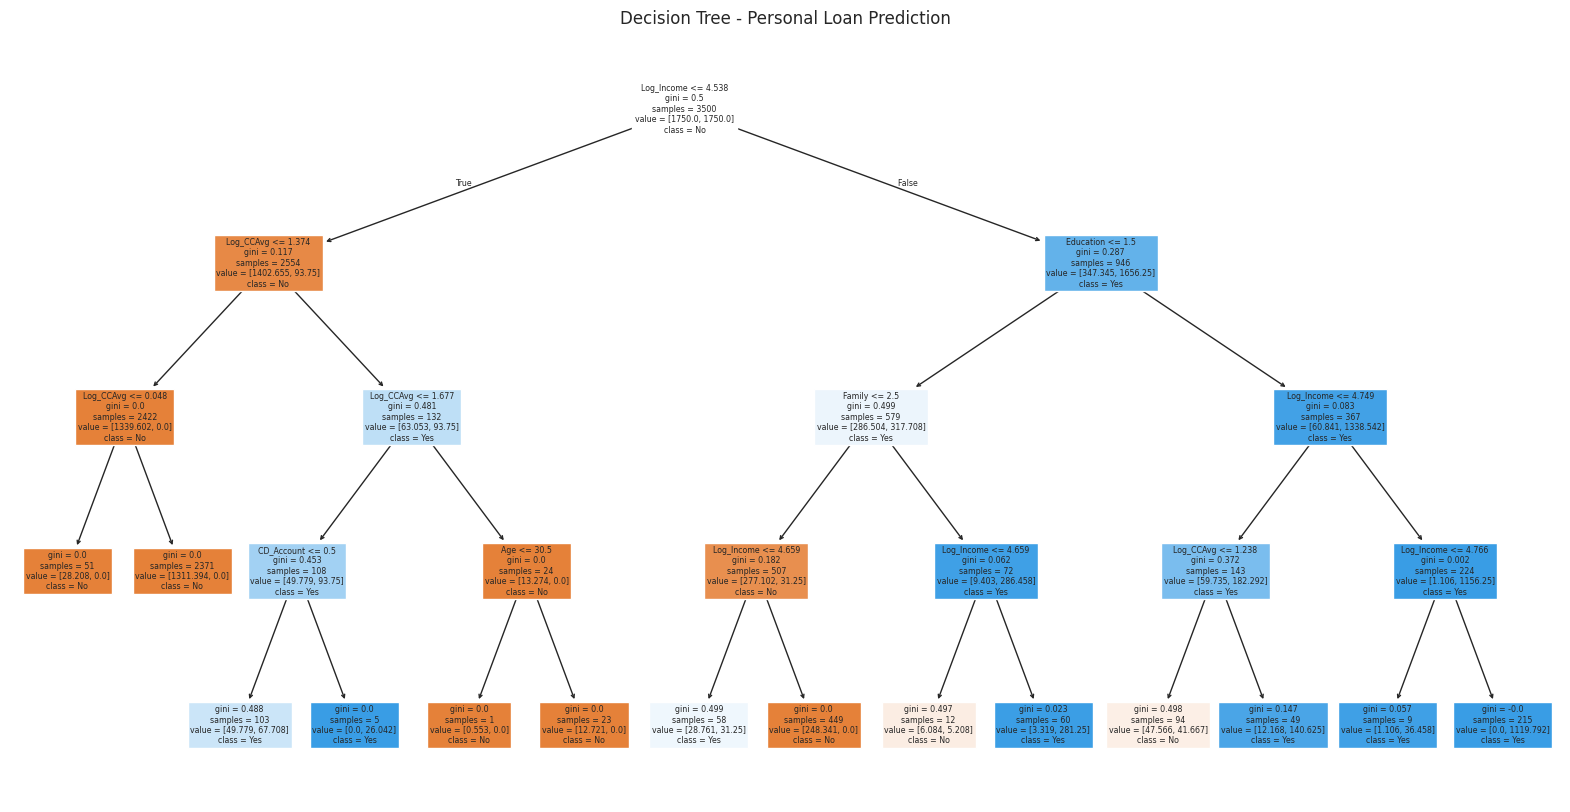

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - Personal Loan Prediction")
plt.show()

Observations:

* The tree is doing a great job of catching all loan acceptors (high recall)

* It does occasionally misfire by predicting a few non-takers as takers (lower precision), which is acceptable for campaigns — better to offer a loan than miss a buyer

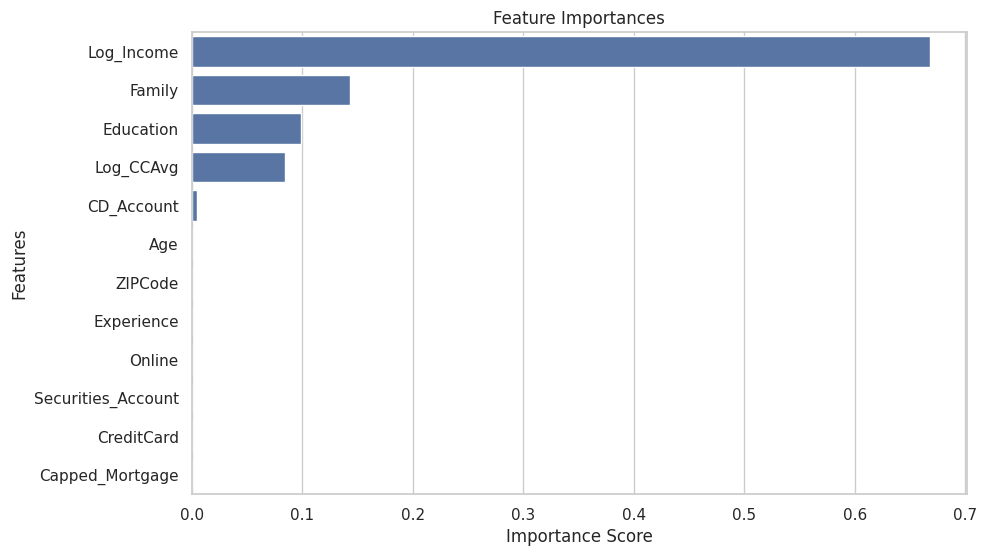

In [38]:
import seaborn as sns
import pandas as pd

feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
